In [30]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.simplefilter('ignore')

In [24]:
df = pd.read_csv('AirPassengers.csv')

In [25]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [27]:
df['ds'] = pd.to_datetime(df['ds'])

In [28]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [26]:
df.columns = ['ds', 'y']

In [6]:
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

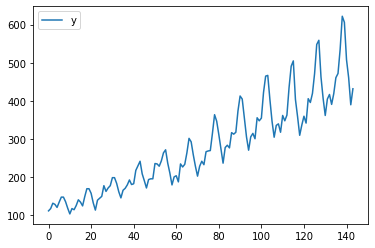

In [12]:
df.plot()

In [44]:
m =Prophet(interval_width=0.95)
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
# prediction
future = model.make_future_dataframe(periods=365)

In [46]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,38.761964,127.013696,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,31.523755,118.752042,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,66.370986,155.226311,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,62.315734,148.125643,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,65.593042,158.744524,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


In [47]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.819339,454.772833,541.260084,519.634103,521.799796,-22.436946,-22.436946,-22.436946,-22.436946,-22.436946,-22.436946,0.0,0.0,0.0,498.382393
505,1961-11-28,520.919838,455.046606,539.015273,519.729405,521.903506,-24.063061,-24.063061,-24.063061,-24.063061,-24.063061,-24.063061,0.0,0.0,0.0,496.856777
506,1961-11-29,521.020338,454.542828,540.703433,519.824707,522.007216,-26.321914,-26.321914,-26.321914,-26.321914,-26.321914,-26.321914,0.0,0.0,0.0,494.698423
507,1961-11-30,521.120837,445.625789,534.022405,519.920009,522.110926,-29.169085,-29.169085,-29.169085,-29.169085,-29.169085,-29.169085,0.0,0.0,0.0,491.951751
508,1961-12-01,521.221336,446.502352,533.227596,520.015311,522.214636,-32.544941,-32.544941,-32.544941,-32.544941,-32.544941,-32.544941,0.0,0.0,0.0,488.676395


In [48]:
forecast[['ds', 'yhat']]

,ds,yhat
0,1949-01-01,84.378677
1,1949-02-01,77.786826
2,1949-03-01,109.994541
3,1949-04-01,107.446903
4,1949-05-01,110.934953
...,...,...
504,1961-11-27,498.382393
505,1961-11-28,496.856777
506,1961-11-29,494.698423
507,1961-11-30,491.951751


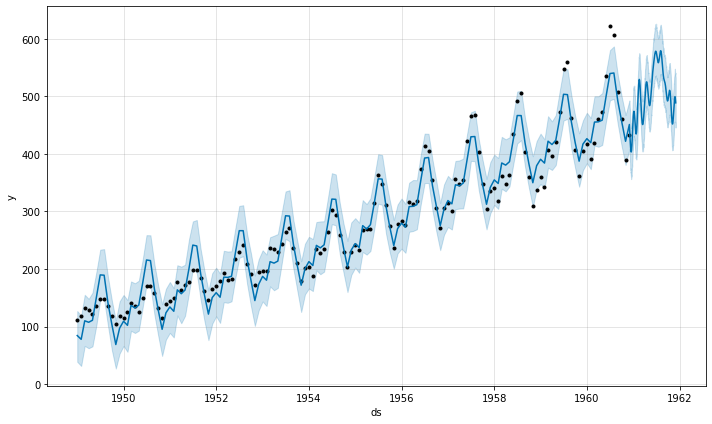

In [49]:
plot1 = m.plot(forecast)

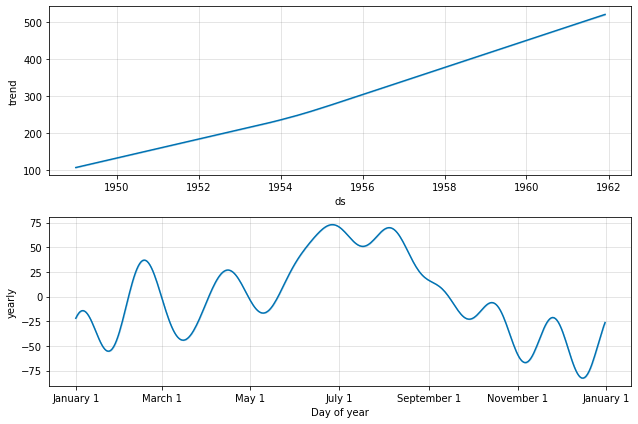

In [50]:
plot = m.plot_components(forecast)

In [51]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.213223,157.513528,150,1951-01-18
1,1951-03-01,169.267028,167.590360,171.053618,178,1951-01-18
2,1951-04-01,156.601332,153.758930,160.037332,163,1951-01-18
3,1951-05-01,142.228261,137.639508,147.364720,172,1951-01-18
4,1951-06-01,177.404761,170.948047,184.380101,178,1951-01-18


In [52]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
223,1960-08-01,527.079522,490.289806,566.787092,606,1959-12-02
224,1960-09-01,485.869209,446.924731,523.831774,508,1959-12-02
225,1960-10-01,452.202363,413.958751,490.250374,461,1959-12-02
226,1960-11-01,422.372655,381.164118,461.199566,390,1959-12-02
227,1960-12-01,447.652267,408.203905,487.119298,432,1959-12-02


In [53]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.409091
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.363636
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.318182
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.318182
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.340909


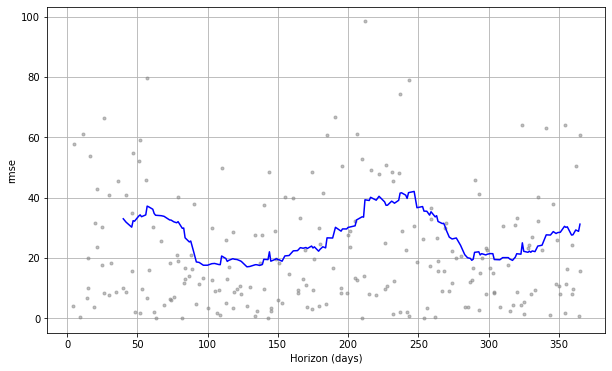

In [54]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432
